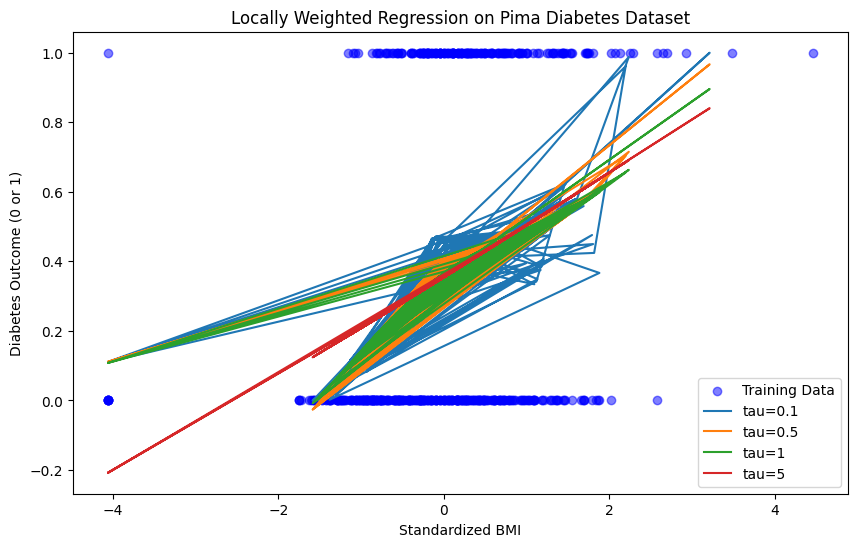

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

def locally_weighted_regression(x_train, y_train, x_test, tau):
    """
    Locally Weighted Regression (LWR) implementation.
    x_train: Training feature values.
    y_train: Training target values.
    x_test: Query point(s) for prediction.
    tau: Bandwidth parameter for weighting.
    """
    m = x_train.shape[0]
    x_train_aug = np.c_[np.ones(m), x_train]  # Add bias term
    x_test_aug = np.c_[np.ones(len(x_test)), x_test]  # Add bias term
    
    y_pred = np.zeros(len(x_test))
    
    for i in range(len(x_test)):
        x_i = x_test_aug[i]
        
        # Compute weights using Gaussian kernel
        W = np.exp(-np.square(x_train - x_test[i]) / (2 * tau ** 2))
        W = np.diag(W.flatten())
        
        # Compute theta: (X'WX)^(-1) X'W y
        theta = np.linalg.pinv(x_train_aug.T @ W @ x_train_aug) @ x_train_aug.T @ W @ y_train
        y_pred[i] = x_i @ theta
    
    return y_pred

# Load dataset
df = pd.read_csv(r"C:\Users\Anshul Halkarni\Desktop\archive (1)\diabetes.csv")  # Ensure the file is in the same directory or provide the correct path

# Select BMI as feature and Outcome as target
x = df["BMI"].values.reshape(-1, 1)
y = df["Outcome"].values

# Standardize the dataset
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split into training and test sets
train_size = int(0.7 * len(x))
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

# Apply LWR with different tau values
tau_values = [0.1, 0.5, 1, 5]
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue', alpha=0.5)

for tau in tau_values:
    y_pred = locally_weighted_regression(x_train, y_train, x_test, tau)
    plt.plot(x_test, y_pred, label=f'tau={tau}')

plt.xlabel("Standardized BMI")
plt.ylabel("Diabetes Outcome (0 or 1)")
plt.legend()
plt.title("Locally Weighted Regression on Pima Diabetes Dataset")
plt.show()


